<a href="https://colab.research.google.com/github/habib-wahid/ML-Assignment/blob/main/svm_for_banking_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = 'drive/MyDrive/Data/bank-data/bank-data/bank-full.csv'
df = pd.read_csv(data,sep = ';')

In [4]:
df.shape

(45211, 17)

In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [8]:
# for value in df['job']:
#   print(value)
df['job'] = df['job'].replace(['blue-collar'], 1)
df['job'] = df['job'].replace(['management'], 2)
df['job'] = df['job'].replace(['technician'], 3)
df['job'] = df['job'].replace(['admin.'], 4)
df['job'] = df['job'].replace(['services'], 5)
df['job'] = df['job'].replace(['retired'], 6)
df['job'] = df['job'].replace(['self-employed'], 7)
df['job'] = df['job'].replace(['entrepreneur'], 8)
df['job'] = df['job'].replace(['unemployed'], 9)
df['job'] = df['job'].replace(['housemaid'], 10)
df['job'] = df['job'].replace(['student'], 11)
df['job'] = df['job'].replace(['unknown'], 12)
df['marital'] = df['marital'].replace(['single'],1)
df['marital'] = df['marital'].replace(['married'],2)
df['marital'] = df['marital'].replace(['divorced'],3)
df['education'] = df['education'].replace(['secondary'],1)
df['education'] = df['education'].replace(['tertiary'],2)
df['education'] = df['education'].replace(['primary'],3)
df['education'] = df['education'].replace(['unknown'],4)
df['default'] = df['default'].replace(['yes'],1)
df['default'] = df['default'].replace(['no'],0)
df['housing'] = df['housing'].replace(['yes'],1)
df['housing'] = df['housing'].replace(['no'],0)
df['loan'] = df['loan'].replace(['yes'],1)
df['loan'] = df['loan'].replace(['no'],0)
df['contact'] = df['contact'].replace(['cellular'],1)
df['contact'] = df['contact'].replace(['unknown'],2)
df['contact'] = df['contact'].replace(['telephone'],3)
df['month'] = df['month'].replace(['jan'],1)
df['month'] = df['month'].replace(['feb'],2)
df['month'] = df['month'].replace(['mar'],3)
df['month'] = df['month'].replace(['apr'],4)
df['month'] = df['month'].replace(['may'],5)
df['month'] = df['month'].replace(['jun'],6)
df['month'] = df['month'].replace(['jul'],7)
df['month'] = df['month'].replace(['aug'],8)
df['month'] = df['month'].replace(['sep'],9)
df['month'] = df['month'].replace(['oct'],10)
df['month'] = df['month'].replace(['nov'],11)
df['month'] = df['month'].replace(['dec'],12)
df['poutcome'] = df['poutcome'].replace(['unknown'],1)
df['poutcome'] = df['poutcome'].replace(['failure'],2)
df['poutcome'] = df['poutcome'].replace(['other'],3)
df['poutcome'] = df['poutcome'].replace(['success'],4)

In [9]:
df['y'] = df['y'].replace(['no'],0)
df['y'] = df['y'].replace(['yes'],1)

In [10]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,3,2,2,0,825,0,0,1,17,11,977,3,-1,0,1,1
45207,71,6,3,3,0,1729,0,0,1,17,11,456,2,-1,0,1,1
45208,72,6,2,1,0,5715,0,0,1,17,11,1127,5,184,3,4,1
45209,57,1,2,1,0,668,0,0,3,17,11,508,4,-1,0,1,0
45210,37,8,2,1,0,2971,0,0,1,17,11,361,2,188,11,3,0


In [11]:
df_yes = df[df.y == 1]
df_no = df[df.y == 0]

In [12]:
df_no.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,2,2,0,2143,1,0,2,5,5,261,1,-1,0,1,0
1,44,3,1,1,0,29,1,0,2,5,5,151,1,-1,0,1,0
2,33,8,2,1,0,2,1,1,2,5,5,76,1,-1,0,1,0
3,47,1,2,4,0,1506,1,0,2,5,5,92,1,-1,0,1,0
4,33,12,1,4,0,1,0,0,2,5,5,198,1,-1,0,1,0


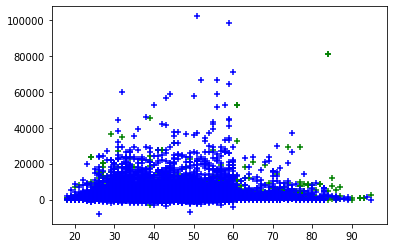

In [15]:
plt.scatter(df_yes['age'],df_yes['balance'],color='green',marker = '+')
plt.scatter(df_no['age'],df_no['balance'],color='blue',marker = '+')

In [16]:
X = df.drop(['y'], axis=1)
y = df['y']

In [17]:
X.shape

(45211, 16)

In [18]:
y.shape

(45211,)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
X_train.shape,X_test.shape

((36168, 16), (9043, 16))

In [21]:
cols = X_train.columns
cols

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [23]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [24]:
X_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04
mean,-2.876119e-16,-8.015412e-17,3.457629e-17,-7.023309e-17,9.036985e-18,2.121727e-17,2.161018e-18,9.626353e-17,-1.584910e-16,-3.221881e-17,1.831954e-17,-6.954549e-17,9.734404e-17,1.335902e-17,2.750387e-18,5.815103e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.160023e+00,-1.012050e+00,-1.365081e+00,-8.309468e-01,-1.360195e-01,-3.046241e+00,-1.114452e+00,-4.358125e-01,-6.811231e-01,-1.780339e+00,-2.131076e+00,-1.000005e+00,-5.678362e-01,-4.102219e-01,-2.414050e-01,-4.144227e-01
25%,-7.465292e-01,-6.366264e-01,-1.365081e+00,-8.309468e-01,-1.360195e-01,-4.217209e-01,-1.114452e+00,-4.358125e-01,-6.811231e-01,-9.389195e-01,-4.783718e-01,-6.003899e-01,-5.678362e-01,-4.102219e-01,-2.414050e-01,-4.144227e-01
50%,-1.811316e-01,-2.612024e-01,2.770479e-01,-8.309468e-01,-1.360195e-01,-2.994314e-01,8.973019e-01,-4.358125e-01,-6.811231e-01,2.270253e-02,-6.519565e-02,-3.016481e-01,-2.442785e-01,-4.102219e-01,-2.414050e-01,-4.144227e-01
75%,6.669648e-01,4.896456e-01,2.770479e-01,3.270128e-01,-1.360195e-01,1.975381e-02,8.973019e-01,-4.358125e-01,9.565063e-01,6.237163e-01,7.611566e-01,2.337591e-01,7.927914e-02,-4.102219e-01,-2.414050e-01,-4.144227e-01
max,5.095913e+00,3.117613e+00,1.919176e+00,2.642932e+00,7.351886e+00,3.268239e+01,8.973019e-01,2.294565e+00,2.594136e+00,1.825744e+00,2.413861e+00,1.808067e+01,1.949274e+01,8.318318e+00,1.134884e+02,3.905128e+00


In [25]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8978


**Run SVM with rbf kernel and C=100.0**

In [26]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8896


**Run SVM with linear kernel and C=1.0**

In [27]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8932


**Run SVM with linear kernel and C=100.0**

In [28]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8932


**Run SVM with polynomial kernel and C=1.0**

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

**Run SVM with polynomial kernel and C=100.0**

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))